# Miniproject 3 : Piecewise Regression and Resampling Techniques
   
-Dataset Ames Housing Dataset

This mini-project involves:    
- Piecewise Linear and Piecewise Polynomial Regression    
- Resampling Techniques: k-fold cross validation and bootstrapping

Submission: 

For this project, you will submit your .ipynb file through Blackboard. 

### Task 1: Piecewise Regression

For the Housing Dataset from mini-project1 :   

a. Randomly split the dataset into 80% training set and 20% validation set. (Feel free to write your own function to split data or use scikit learn functions)  
b. Perform:   
i)Multiple Linear Regression,  ii)Polynomial Regression of degree 2, iii)Piecwise Linear Regression (Split/cut K = 5, i.e. 6 bins), and iv) Spline with d = 3 and K = 3. 
          
Report:  
1. Epochs vs Training Error curve for all 4 models in b.    
2. Validation error for all 4 models.  Which one has the best Training and Validation Error?

Note :   

- Make sure you use all 5 input variables from Housing Data and same training and validation set from a) for all models in b.     
- You can still use the LRGD class you created in project 2 or use scikit learn. You just need to create new varaibles using appropriate indicator functions , express it as a additive model and use LRGD or use scikit learn.   
- Refer to general regression equation form for each models ii) to iv) on how to create new variables. 

Food for Thought:   
Q. Why we can still use LRGD we created on Task 1 for Polynomial, Piecewise and Splines? If you think, we cannot use the same Gradient Descent from LRGD, why not?

    



Before we do anything we first import SLRGD, but call it GLRGD, the generi linear regression with gradient descent, as we will be using it in a lot of contexts.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)
df.head()  

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [53]:
# A Simple class for performing Simple Linear Regression using Gradient Descent(GD). 
# 
class GLRGD:
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
# A member function that fits input X to output y using GD
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.beta = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.intercept = np.array([0.])
        self.losses = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output

            # Update parameters of Linear Regression
            self.beta+= self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.intercept += self.eta * 2.0 * errors.mean()
            
            loss = (errors**2).mean()
            self.losses.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.beta) + self.intercept

    def predict(self, X):
        return self.net_input(X)

In [54]:
df = df.dropna(axis=0)
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [55]:
X = df[["Overall Qual","Overall Cond", "Total Bsmt SF","Central Air","Gr Liv Area"]]
y = df["SalePrice"]

from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y[:, np.newaxis]).flatten()

print(X,y)

[[-0.06777463 -0.50633511  0.06443334  0.26779855  0.30887979]
 [-0.77674566  0.39357723 -0.38501522  0.26779855 -1.19492198]
 [-0.06777463  0.39357723  0.62964896  0.26779855 -0.33815071]
 ...
 [-0.77674566 -0.50633511 -0.31691695  0.26779855 -1.04849917]
 [-0.77674566 -0.50633511  0.7658455   0.26779855 -0.21942951]
 [ 0.6411964  -0.50633511 -0.1262418   0.26779855  0.98954796]] [ 0.42783926 -0.94949293 -0.11057241 ... -0.61142048 -0.13561481
  0.08976682]


/var/folders/00/fh_1jnz55h93_vb9q4gt_9_80000gn/T/ipykernel_4717/343993009.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = sc_y.fit_transform(y[:, np.newaxis]).flatten()


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Multiple Linear Regression

SLR coefficient beta =  [0.48005295 0.00658275 0.20350608 0.03721219 0.33758664]
SLR intercept =  [-0.00080446]


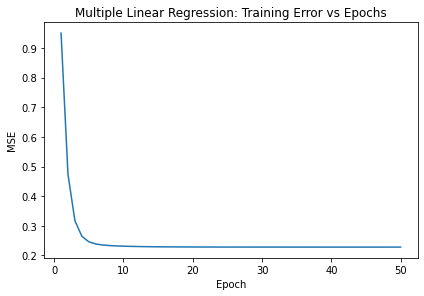

In [57]:
# from sklearn.linear_model import LinearRegression


mlr = GLRGD(eta=0.1)  # Try with different eta values: eta = 0.01 , 0.1, 0.5 and notice how yout error vs epochs curve changes. 
mlr.fit(X_train, y_train)
print('SLR coefficient beta = ', mlr.beta)
print('SLR intercept = ', mlr.intercept)
plt.plot(range(1, mlr.n_iter+1), mlr.losses)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.title('Multiple Linear Regression: Training Error vs Epochs')
plt.show()





In [58]:
y_pred = mlr.predict(X_test)

from sklearn import metrics

metrics.mean_squared_error(y_pred,y_test)

0.26285481254819093

#### Polynomial Regression of degree 2

In [59]:
from sklearn.preprocessing import PolynomialFeatures
 
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)

prd2 = GLRGD(eta = 0.1)
prd2.fit(X_train_poly, y_train)
print('PRd2 coefficient beta(s) = ', prd2.beta)
print('PRd2 intercept = ', prd2.intercept)
plt.plot(range(1, mlr.n_iter+1), prd2.losses)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.title('Polynomial Regression degree 2: Training Error vs Epochs')
plt.show()




ValueError: Expected 2D array, got 1D array instead:
array=[ 1.24171738 -0.80049063 -0.20448142 ...  1.72691394 -0.32343284
 -0.19947294].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test_poly = poly_features.fit_transform(X_test)
y_pred_poly = prd2.predict(X_test_poly)



In [ ]:
print(metrics.mean_squared_error(y_pred_poly,y_test))

901721593.4690629


### Piecewise-linear regression

### Task 2: Ridge Regression and LASSO

1. For Housing Data, perform Ridge Regression and LASSO for the training data set from Task 1 for different values of lambda.   
    
    Report:    
    1. Values of lambda vs training error curve. 
    2. Values of lambda vs validation error. 
    3. Compare Validarion Error from MLR in Task 1 to Validation Error from Ridge and LASSO. 

    Do not forget to standarize all inputs. For Ridge and Lasso, we have not implemented our own solver. Please use scikit learn library. 
    

### Task 3: Resampling

For the Housing Data: (Complete Data set, not only training from Task 1)

1. Cross Validation: Perform Multiple Linear Regression with K-fold cross validation. You can choose K = 5.    
Report: 
    a. Regression Coeffs for each dataset. 
    b. Cross validation Error. 

2. Bootstrapping: Create 10 different datasets each with 3N/4 data samples using bootstrapping (i.e. Resampling with replacement), where N = total numbers of data samples in Housing Data. Perform Multiple Linear Regression on 10 datasets you created.

Report:   

a. Regression Coeffs for each dataset.  
b. Average error. 

You can write your own resample fucntions but feel free to use scikit learn resample. 



